# Punti Wi-FI, Comune di Prato, Aggiornamento del 24/12/2020.

Fonte dati: http://odn.comune.prato.it/dataset/

#### Non lavoro per il Comune di Prato.

In [10]:
import requests
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
pd.set_option('mode.chained_assignment', None)

In [17]:
### Verifica richiesta dell'API ###
df = pd.read_csv('http://odn.comune.prato.it/geonetwork/srv/en/resources.get?id=149&fname=puntiaccesso.csv&access=private') 
df

,CODICE,INDIRIZZOIP,ATTIVO,DATAATTIVAZIONE,NOMEPUNTOACCESSO,INDIRIZZOIMPIANTO,CAPIMPIANTO,LOCALITAIMPIANTO,PROVINCIAIMPIANTO,COORDINATELATITUDINE,COORDINATELONGITUDINE
0,1,83.149.142.110,0,2011-09-15,Cascine di Tavola,W,59100,PRATO,PO,43.843614,11.058994
1,2,83.149.153.164,1,2011-09-15,Parco di Galceti Villa Fiorelli,NaN,59100,PRATO,PO,43.909434,11.087596
2,3,83.149.153.161,1,2011-09-15,Parco di Galceti HS1,NaN,59100,PRATO,PO,43.908539,11.087544
3,4,83.149.153.162,1,2011-09-15,Parco di Galceti HS2,NaN,59100,PRATO,PO,43.908311,11.086842
4,5,83.149.162.205,1,2012-05-17,Piazza delle Carceri,PIAZZA DELLE CARCERI,59100,PRATO,PO,43.879226,11.097522
...,...,...,...,...,...,...,...,...,...,...,...
158,182,10.255.0.189,1,2014-03-17,ScuolaMarconi23,VIA GALCIANESE 20,59100,PRATO,PO,43.879138,11.082597
159,183,10.255.0.193,0,2014-03-17,ScuolaMarconi27,VIA GALCIANESE 20,59100,PRATO,PO,43.879136,11.082593
160,184,10.255.0.194,1,2014-03-17,ScuolaMarconi29,VIA GALCIANESE 20,59100,PRATO,PO,43.879134,11.082591
161,185,10.255.0.192,0,2015-04-14,ScuolaDagomari03,VIA REGGIANA 86,59100,PRATO,PO,43.875900,11.068900


## Quanti punti Wi-Fi ci sono nel Comune di Prato? 

In [15]:
len(df)

163

## Quanti attivi e quanti non attivi?

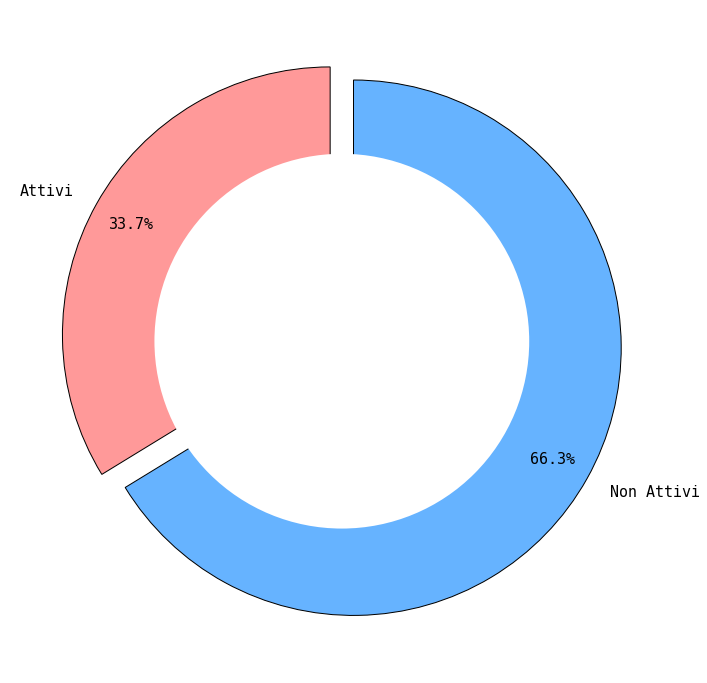

In [37]:
df_nonattivi = df[df["ATTIVO"] == 0]
non_attivi = len(df_nonattivi)
df_attivi = df[df["ATTIVO"] == 1]
attivi = len(df_attivi)
labels = ["Attivi", "Non Attivi"]
sizes = [attivi, non_attivi]
#colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
#explsion
explode = (0.05,0.05)

plt.figure(figsize = (10,10))
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85,
        explode = explode, textprops={'size': 15, "family": "monospace"},
        wedgeprops={"edgecolor":"k",'linewidth': 1, 'antialiased': True})

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')  
plt.tight_layout()
plt.show()

## Dove sono e con quale frequenza?

In [38]:
freq_localita = df['LOCALITAIMPIANTO'].value_counts()

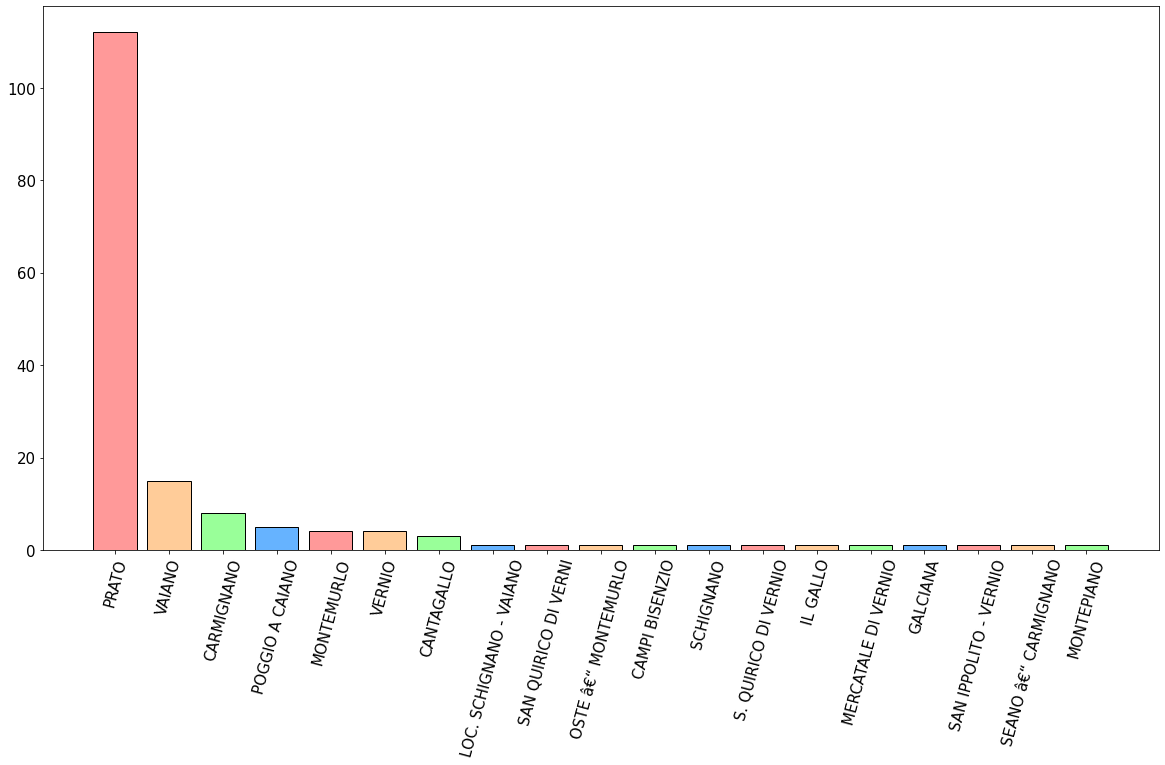

In [39]:
plt.figure(figsize = (20,10))
plt.xticks(rotation = 75, size = 15)
plt.yticks(size = 15)
plt.bar(freq_localita.index, height = freq_localita.values, 
        color = ['#ff9999', '#ffcc99', '#99ff99', '#66b3ff'], edgecolor = "black")
plt.show()

# Attivi e non in ogni zona

In [40]:
loc_attivi = df_attivi["LOCALITAIMPIANTO"].value_counts()
loc_nonattivi = df_nonattivi["LOCALITAIMPIANTO"].value_counts()

## Attivi

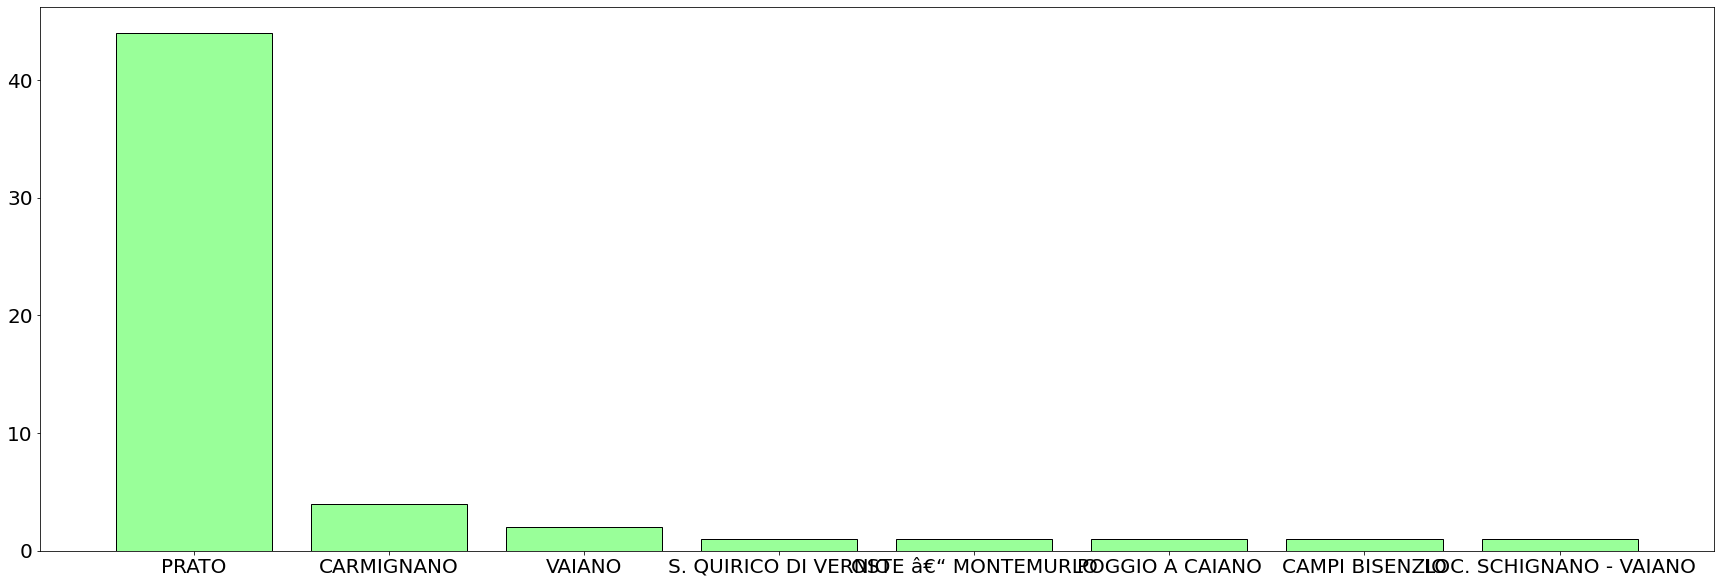

In [41]:
plt.figure(figsize = (30,10))
plt.xticks(size = 20, rotation = )
plt.yticks(size = 20)
plt.bar(loc_attivi.index, height = loc_attivi.values, color = '#99ff99',
       edgecolor = "black")
plt.show()

## Non Attivi

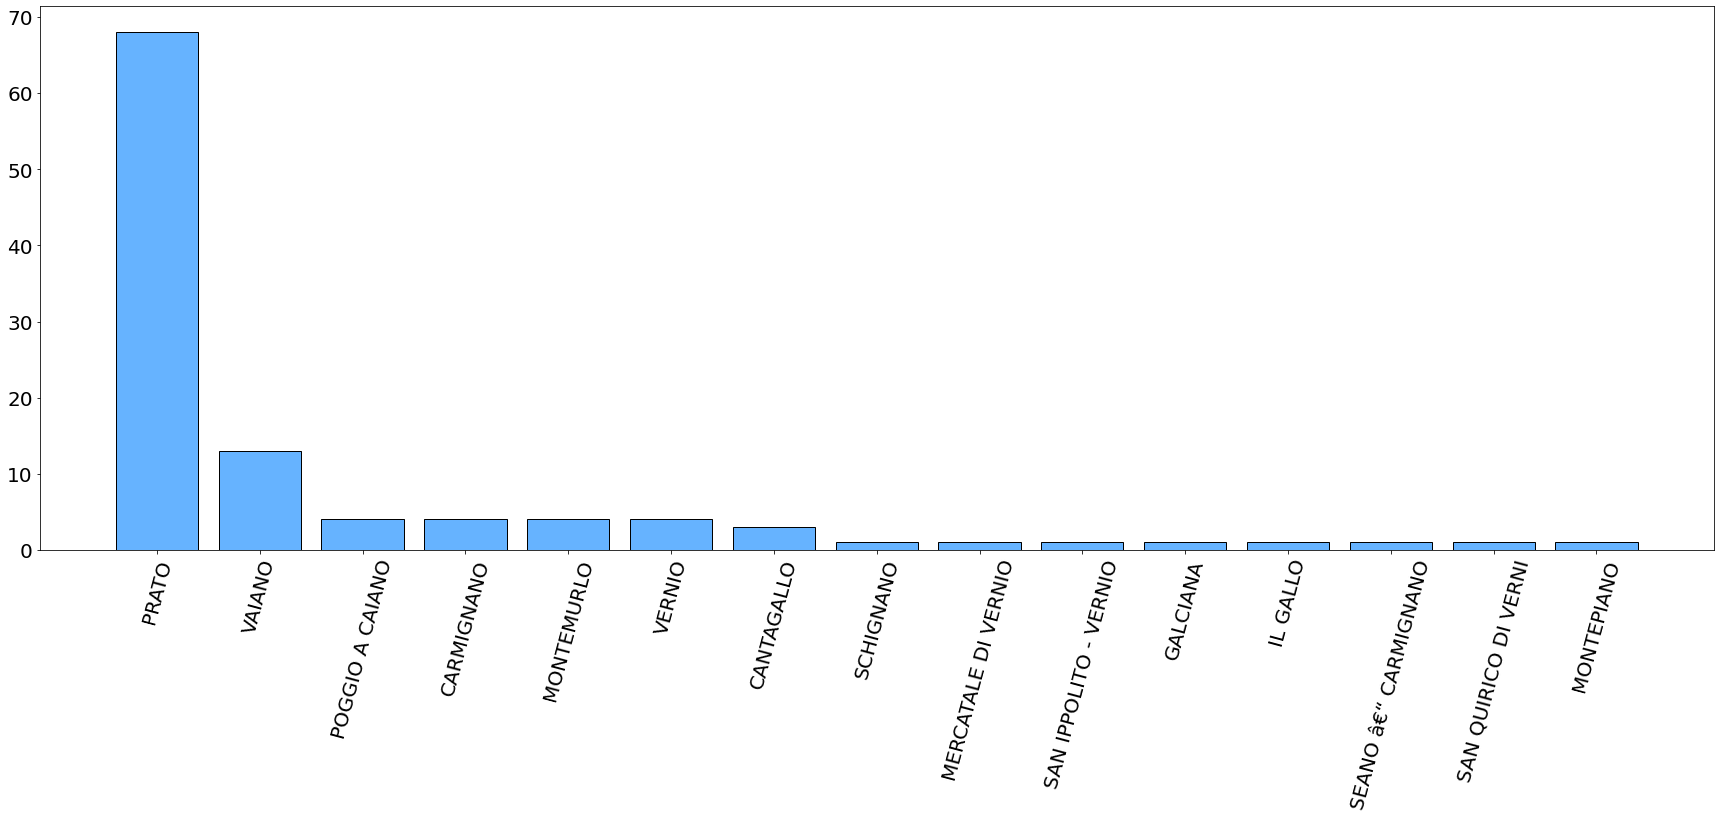

In [42]:
plt.figure(figsize = (30,10))
plt.xticks(rotation = 75, size = 20)
plt.yticks(size = 20)
plt.bar(loc_nonattivi.index, height = loc_nonattivi.values, color = '#66b3ff',
       edgecolor = "black")
plt.show()

# Tabella Percentuali Attivi / Non Attivi

In [27]:
uni_loc = df['LOCALITAIMPIANTO'].unique()
stat_1 = []
stat_0 = []
for i in range(len(uni_loc)):
    stat_1.append(len(df_attivi[df_attivi['LOCALITAIMPIANTO'] == uni_loc[i]]))
    stat_0.append(len(df_nonattivi[df_nonattivi['LOCALITAIMPIANTO'] == uni_loc[i]]))
stat_1 = pd.Series(stat_1)
stat_0 = pd.Series(stat_0)
perc_1 = stat_1 / (stat_1 + stat_0)
perc_0 = stat_0 / (stat_1 + stat_0)
df_stat = pd.DataFrame({"Località":uni_loc, "Attivi": stat_1, "Non Attivi": stat_0, "Percentuale Attivi": perc_1, 
                       "Percentuale Non Attivi": perc_0})
df_stat

,Località,Attivi,Non Attivi,Percentuale Attivi,Percentuale Non Attivi
0,PRATO,0,0,NaN,NaN
1,CAMPI BISENZIO,0,0,NaN,NaN
2,VAIANO,0,0,NaN,NaN
3,CARMIGNANO,0,0,NaN,NaN
4,SAN IPPOLITO - VERNIO,0,0,NaN,NaN
5,POGGIO A CAIANO,0,0,NaN,NaN
6,MONTEPIANO,0,0,NaN,NaN
7,LOC. SCHIGNANO - VAIANO,0,0,NaN,NaN
8,MONTEMURLO,0,0,NaN,NaN
9,CANTAGALLO,0,0,NaN,NaN


# Quando sono stati Attivati?

In [28]:
import datetime as dt
# pulizia date
for i in range(len(df)):
    if "T" in df['DATAATTIVAZIONE'][i]:
        df['DATAATTIVAZIONE'][i] = df["DATAATTIVAZIONE"][i].replace("T", " ")

# continuo pulizia date
if not isinstance(df['DATAATTIVAZIONE'][0], dt.date):
    df['DATAATTIVAZIONE'] = pd.to_datetime(df['DATAATTIVAZIONE'], errors='coerce')

In [29]:
data_att = df["DATAATTIVAZIONE"].dt.to_period('M')
data_freq = data_att.value_counts()
df_att = pd.DataFrame({"Data Attivazione": data_freq.index, "Frequenza": data_freq.values})
df_att.sort_values(by = "Data Attivazione", inplace = True)
df_att.reset_index(inplace = True)
df_att.drop("index", axis = 1, inplace = True)
df_att

,Data Attivazione,Frequenza
0,2011-09,6
1,2011-11,4
2,2012-03,1
3,2012-05,3
4,2013-01,75
5,2013-03,2
6,2013-04,1
7,2013-05,11
8,2013-06,10
9,2013-07,18


#### Il periodo in cui sono stati attivati più Wi-Fi è stato il Gennaio del 2013, del resto, l'anno con più installazioni è rimasto il 2013.

Guardare il seguente link per più statistiche: http://www.notiziediprato.it/news/prato-wifi-tocca-quota-centomila-accessi-nel-2013.
Accesso Wi-Fi dalle Farmacie Pratesi durante l'anno 2013: https://iltirreno.gelocal.it/prato/cronaca/2013/06/25/news/accesso-wifi-in-cinque-farmacie-della-provincia-di-prato-1.7319585.